#### Problem Statement 1

Objective: Pick your own document (say A) and create BOW using a count vectorizer. Use another document (say B) and identify how many words of the B document are present in the BOW of A.

In [13]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

doc_1=["In supervised learning, we use known or labeled data for the training data. Since the data is known, the learning is, therefore, supervised, i.e., directed into successful execution. The input data goes through the Machine Learning algorithm and is used to train the model. Once the model is trained based on the known data, you can use unknown data into the model and get a new response."]
doc_2=["In unsupervised learning, the training data is unknown and unlabeled - meaning that no one has looked at the data before. Without the aspect of known data, the input cannot be guided to the algorithm, which is where the unsupervised term originates from. This data is fed to the Machine Learning algorithm and is used to train the model. The trained model tries to search for a pattern and give the desired response. In this case, it is often like the algorithm is trying to break code like the Enigma machine but without the human mind directly involved but rather a machine."]



In [32]:
#defining stopwords
stop_words = stopwords.words('english')

#Using countvectorizer to convert sentence into tokens
c_vect = CountVectorizer(stop_words=stop_words)

c_vect.fit_transform(doc_1)
print("Bag of Words of DOC 1 :",c_vect.get_feature_names())

Bag of Words of DOC 1 : ['algorithm', 'based', 'data', 'directed', 'execution', 'get', 'goes', 'input', 'known', 'labeled', 'learning', 'machine', 'model', 'new', 'response', 'since', 'successful', 'supervised', 'therefore', 'train', 'trained', 'training', 'unknown', 'use', 'used']


In [33]:
c_vect.fit_transform(doc_2)
print("Bag of Words of DOC 2 :",c_vect.get_feature_names())

Bag of Words of DOC 2 : ['algorithm', 'aspect', 'break', 'cannot', 'case', 'code', 'data', 'desired', 'directly', 'enigma', 'fed', 'give', 'guided', 'human', 'input', 'involved', 'known', 'learning', 'like', 'looked', 'machine', 'meaning', 'mind', 'model', 'often', 'one', 'originates', 'pattern', 'rather', 'response', 'search', 'term', 'train', 'trained', 'training', 'tries', 'trying', 'unknown', 'unlabeled', 'unsupervised', 'used', 'without']


In [37]:
c_vect_2 = c_vect.transform(doc_2)

In [42]:
df = pd.DataFrame(c_vect_2.toarray(),columns=c_vect.get_feature_names())

In [46]:
df.columns

Index(['algorithm', 'based', 'data', 'directed', 'execution', 'get', 'goes',
       'input', 'known', 'labeled', 'learning', 'machine', 'model', 'new',
       'response', 'since', 'successful', 'supervised', 'therefore', 'train',
       'trained', 'training', 'unknown', 'use', 'used'],
      dtype='object')

In [48]:
pd.set_option('display.max_columns', None)
df

,algorithm,based,data,directed,execution,get,goes,input,known,labeled,learning,machine,model,new,response,since,successful,supervised,therefore,train,trained,training,unknown,use,used
0,3,0,4,0,0,0,0,1,1,0,2,3,2,0,1,0,0,0,0,1,1,1,1,0,1


From the above table we can see the BOW 2 Present in BOW 1

#### Problem Statement 2

Objective: Pick your choice of document and update the emotion document accordingly (you document words and associated emotion where applicable) and analyse the sentiments of people.

In [74]:
import string
from collections import Counter
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [54]:
#Reading our text document file

file = open('story.txt').read()


In [56]:
#Lets convert all text into lower case letter 
file_lower = file.lower()
file_lower

'knowing that mrs. mallard was afflicted with a heart trouble, great care was taken to break to her as gently as possible the news of her husband\'s death.\n\n     it was her sister josephine who told her, in broken sentences; veiled hints that revealed in half concealing. her husband\'s friend richards was there, too, near her. it was he who had been in the newspaper office when intelligence of the railroad disaster was received, with brently mallard\'s name leading the list of "killed." he had only taken the time to assure himself of its truth by a second telegram, and had hastened to forestall any less careful, less tender friend in bearing the sad message.\n\n     she did not hear the story as many women have heard the same, with a paralyzed inability to accept its significance. she wept at once, with sudden, wild abandonment, in her sister\'s arms. when the storm of grief had spent itself she went away to her room alone. she would have no one follow her.\n\n     there stood, facin

In [57]:
#Now we will remove all punctuation from sting

file_cleaned = file_lower.translate(str.maketrans('','',string.punctuation))
file_cleaned

'knowing that mrs mallard was afflicted with a heart trouble great care was taken to break to her as gently as possible the news of her husbands death\n\n     it was her sister josephine who told her in broken sentences veiled hints that revealed in half concealing her husbands friend richards was there too near her it was he who had been in the newspaper office when intelligence of the railroad disaster was received with brently mallards name leading the list of killed he had only taken the time to assure himself of its truth by a second telegram and had hastened to forestall any less careful less tender friend in bearing the sad message\n\n     she did not hear the story as many women have heard the same with a paralyzed inability to accept its significance she wept at once with sudden wild abandonment in her sisters arms when the storm of grief had spent itself she went away to her room alone she would have no one follow her\n\n     there stood facing the open window a comfortable r

Still we can see \n in our text, let's replace all \n with space ''

In [58]:
clean_text = file_cleaned.replace('\n', '')

In [59]:
clean_text

'knowing that mrs mallard was afflicted with a heart trouble great care was taken to break to her as gently as possible the news of her husbands death     it was her sister josephine who told her in broken sentences veiled hints that revealed in half concealing her husbands friend richards was there too near her it was he who had been in the newspaper office when intelligence of the railroad disaster was received with brently mallards name leading the list of killed he had only taken the time to assure himself of its truth by a second telegram and had hastened to forestall any less careful less tender friend in bearing the sad message     she did not hear the story as many women have heard the same with a paralyzed inability to accept its significance she wept at once with sudden wild abandonment in her sisters arms when the storm of grief had spent itself she went away to her room alone she would have no one follow her     there stood facing the open window a comfortable roomy armchai

We can see in our text there is more space between two words, we will remove it too

In [60]:
clean_text = clean_text.replace('     ', ' ')

In [62]:
clean_text

'knowing that mrs mallard was afflicted with a heart trouble great care was taken to break to her as gently as possible the news of her husbands death it was her sister josephine who told her in broken sentences veiled hints that revealed in half concealing her husbands friend richards was there too near her it was he who had been in the newspaper office when intelligence of the railroad disaster was received with brently mallards name leading the list of killed he had only taken the time to assure himself of its truth by a second telegram and had hastened to forestall any less careful less tender friend in bearing the sad message she did not hear the story as many women have heard the same with a paralyzed inability to accept its significance she wept at once with sudden wild abandonment in her sisters arms when the storm of grief had spent itself she went away to her room alone she would have no one follow her there stood facing the open window a comfortable roomy armchair into this 

As we have clear our text by replacing punctuations and blank spaces, now, we will remove stopwords from our text data

In [63]:
#Lets convert text into tokens 

tokenized_words = word_tokenize(clean_text, "english")

In [65]:
len(tokenized_words)

1012

In [66]:
#Removing stopwords

cleaned_list = []

for word in tokenized_words:
    if word not in stopwords.words('english'):
        cleaned_list.append(word)

Now we will use Lemmatization to convert it into base form

In [68]:
base_words = []

wnl = WordNetLemmatizer()

for word in cleaned_list:
    word = wnl.lemmatize(word)
    base_words.append(word)

In [70]:
#Now we will see the sentiments on story
emotion_list = []
with open('emotions.txt', 'r') as file:
    for line in file:
        clear_line = line.replace("\n", '').replace(",", '').replace("'", '').strip()
        word, emotion = clear_line.split(':')

        if word in base_words:
            emotion_list.append(emotion)
            
w = Counter(emotion_list)

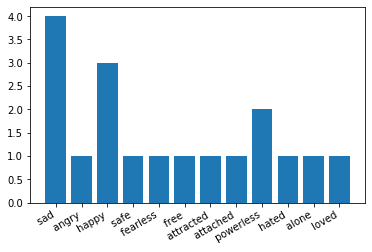

In [72]:
fig, ax1 = plt.subplots()
ax1.bar(w.keys(), w.values())
fig.autofmt_xdate()
plt.savefig('graph.png')
plt.show()

Looks like the story we imported has mix emotions i.e. story is sad as well as happy emotions.

Here we have imported story as a document to check the sentiments on it.